

# 📝 Day 6 Problem: E-commerce Sales Analysis 🛒

### **Scenario**

You have sales data from an e-commerce store. Each record contains the **Product, Category, Units Sold, Price per Unit, and Customer Rating**.
You want to analyze revenue, top products, and customer trends.

---

### **Step 1 – Dataset (Sample 10 Records)**

| Product    | Category    | Units Sold | Price per Unit | Rating |
| ---------- | ----------- | ---------- | -------------- | ------ |
| Laptop     | Electronics | 50         | 600            | 4.5    |
| Smartphone | Electronics | 120        | 400            | 4.3    |
| Headphones | Electronics | 200        | 50             | 4.1    |
| T-Shirt    | Fashion     | 300        | 20             | 4.0    |
| Jeans      | Fashion     | 150        | 40             | 4.2    |
| Shoes      | Fashion     | 100        | 60             | 4.4    |
| Book       | Books       | 250        | 15             | 4.6    |
| Notebook   | Stationery  | 400        | 5              | 4.1    |
| Backpack   | Fashion     | 80         | 45             | 4.3    |
| Monitor    | Electronics | 70         | 200            | 4.4    |

---

### **Step 2 – Tasks**

1. Load dataset into Pandas.
2. Calculate:

   * Total revenue per product (`Units Sold × Price`).
   * Top 3 best-selling products (by revenue).
   * Average customer rating per category.
3. Use **NumPy** for sum, mean, and sorting.
4. Visualizations:

   * **Bar chart** → Revenue by product.
   * **Pie chart** → Revenue share by category.
   * **Heatmap** → Correlation between Units Sold, Price, and Rating.

---

### **Step 3 – Expected Outcome**

* Table with revenues.
* Insights on best products & categories.
* Visualized sales trends.

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    "Product": ["Laptop", "Smartphone", "Headphones", "T-Shirt", "Jeans", 
                "Shoes", "Book", "Notebook", "Backpack", "Monitor"],
    "Category": ["Electronics", "Electronics", "Electronics", "Fashion", "Fashion", 
                 "Fashion", "Books", "Stationery", "Fashion", "Electronics"],
    "Units Sold": [50, 120, 200, 300, 150, 100, 250, 400, 80, 70],
    "Price per Unit": [600, 400, 50, 20, 40, 60, 15, 5, 45, 200],
    "Rating": [4.5, 4.3, 4.1, 4.0, 4.2, 4.4, 4.6, 4.1, 4.3, 4.4]
}


In [16]:
df = pd.DataFrame(data)

df["Revenue"] = df["Units Sold"] * df["Price per Unit"]



In [13]:
top_products = df.sort_values(by="Revenue", ascending=False).head(3)
top_products

,Product,Category,Units Sold,Price per Unit,Rating,Revenue
1,Smartphone,Electronics,120,400,4.3,48000
0,Laptop,Electronics,50,600,4.5,30000
9,Monitor,Electronics,70,200,4.4,14000


In [8]:
avg_rating_category = df.groupby("Category")["Rating"].mean()
avg_rating_category 




array([48000, 30000, 14000, 10000,  6000,  6000,  6000,  3750,  3600,
        2000])

In [9]:
total_revenue = np.sum(df["Revenue"])
total_revenue



np.int64(129350)

In [10]:
mean_rating = np.mean(df["Rating"])
mean_rating 




np.float64(4.29)

In [11]:
sorted_revenue = np.sort(df["Revenue"])[::-1]
sorted_revenue

array([48000, 30000, 14000, 10000,  6000,  6000,  6000,  3750,  3600,
        2000])

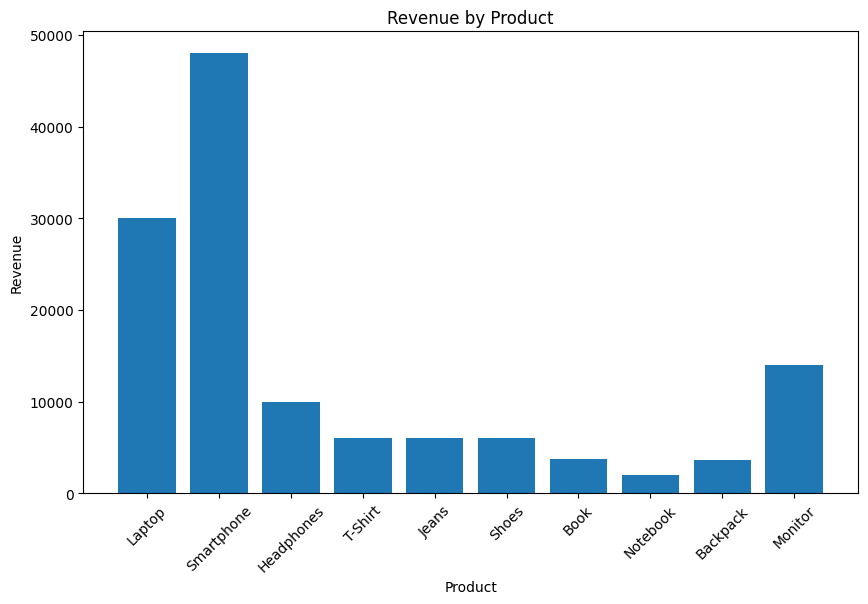

In [5]:

plt.bar(df["Product"], df["Revenue"])
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

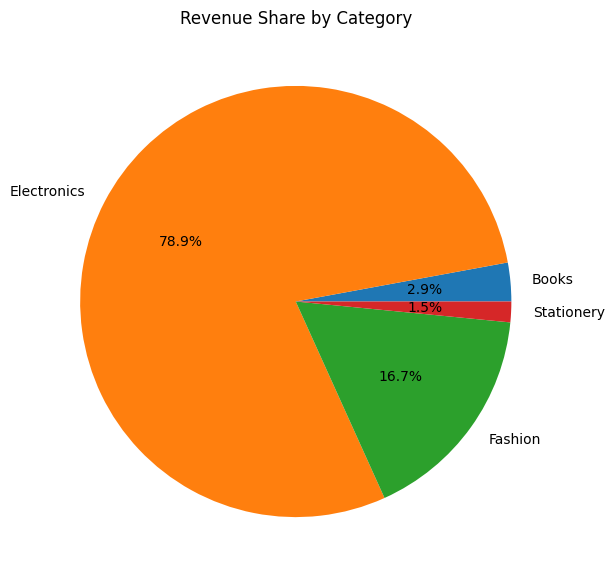

In [6]:

df.groupby("Category")["Revenue"].sum().plot.pie(autopct="%1.1f%%")
plt.title("Revenue Share by Category")
plt.ylabel("")
plt.show()

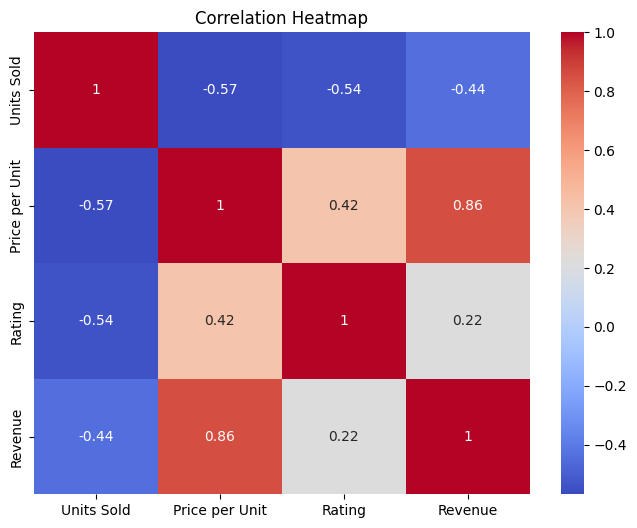

In [7]:

sns.heatmap(df[["Units Sold", "Price per Unit", "Rating", "Revenue"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()